#Importing Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading and Exploring Dataset

In [ ]:
df=pd.read_csv('/content/Startups1.csv')

In [ ]:
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,101-250,89506451,10,20
2,2,Paytm,Noida,2010,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,1001-5000,366600000,7,29


##Data Description

 * ***Company*** - Name of the Startup.

 * ***City*** - The City in which the startup had started.

 * ***Starting Year*** - The Year in which the startup was started.


 * ***No. of Employees*** - Number of employees in the startup.

 * ***Funding Amount in $*** - Total funding amount funded to the startup.

 * ***Funding Rounds*** - Funding rounds are the number of times a startup goes back to the market to raise more capital. The goal of every round is for founders to trade equity in their business for the capital they can utilize to advance their companies to the next level.

 * ***No. of Investors*** - Number of investors in the startup.

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,1001-5000,445920356,12,16
1,Classplus,Noida,2018,101-250,89506451,10,20
2,Paytm,Noida,2010,501-1000,32448851,4,4
3,Apna,Mumbai,2019,101-250,93450000,4,6
4,Razorpay,Bengaluru,2014,1001-5000,366600000,7,29


In [ ]:
df.sample(5)

,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
198,LocoNav,Azadpur,2015,101-250,7420000,3,3
65,Agnikul,Chennai,2017,51-100,14543144,4,17
73,OfBusiness,Gurgaon,2015,501-1000,193125171,7,13
273,Setu,Bengaluru,2018,Nov-50,18549687,2,4
267,Kinara Capital,Bengaluru,2011,251-500,70196840,8,10


In [ ]:
df.shape

(300, 7)

Dataset consists of **```300 rows ```** and **```8 columns```**

##Checking for the columns datatypes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   No. of Employees     300 non-null    object
 4   Funding Amount in $  300 non-null    int64 
 5   Funding Round        300 non-null    int64 
 6   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


The column **```No. of Employees```** is stored as an object type. To understand how the data is represented within this column and determine if it needs to be converted to integers or encoded differently, further investigation is necessary.

For the remaining columns, their data types appear to be appropriate or normal.

In [ ]:
df['No. of Employees'].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', 'Nov-50',
       '251-500', '10001+', '51-100', '1-Oct', 'Not Available'],
      dtype=object)

Here we found the unique values of the **```No. of Employees```** columns doesn't represent a discrete number of employees in each company,but it represents the range of employees found in the company where each value  might represent a category for the number of employees.

For the two values ***1-Oct*** and ***Nov-50*** they seem different than the other categories since they doesn't represent a range of values for the number of employees.So we might consider ***Oct***  represent ***10*** and ***Nov*** to represent ***11*** .



In [ ]:
df['No. of Employees'].value_counts()

101-250          63
Nov-50           45
1001-5000        44
251-500          42
51-100           38
501-1000         36
10001+           12
1-Oct            11
5001-10000        8
Not Available     1
Name: No. of Employees, dtype: int64

Also There is only one record for the ***Not available*** category,which means that there are no available employees in this company,and it is not very useful for the data, Let's First see this row.

In [ ]:
df[df['No. of Employees']=='Not Available']

,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
285,WOW Skin Science India Ltd,Bengaluru,2016,Not Available,0,0,0


This category is very likely to be unuseful to our dataset,since all the values in the **```Funding Amount in $```** , **```Funding Round```**  and **```No. of Investors```** are **0**,which probably indicates that this company might have closed. Also these values will represent an outliers in these columns.So deleting this row will be the best option.

##Descriptive Statistics.





> ### 1. For numerical columns.





In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Starting Year,300.0,2.013393e+03,5.139390e+00,1984.0,2012.0,2015.0,2.016000e+03,2.020000e+03
Funding Amount in $,300.0,3.148655e+08,1.628802e+09,0.0,14287377.0,41087733.5,1.319438e+08,2.476762e+10
Funding Round,300.0,5.986667e+00,4.239465e+00,0.0,3.0,5.0,7.000000e+00,2.500000e+01
No. of Investors,300.0,1.055000e+01,7.530151e+00,0.0,5.0,9.0,1.400000e+01,4.500000e+01


  * Starting Year:
    * The dataset comprises entries spanning from 1984 to 2020.
    * The majority of startups seem to have initiated operations between 2012 and 2016.
    * The distribution appears relatively centered around the mid-2010s.

  * Funding Amount in $:
      * The funding amounts vary widely, with a considerable standard deviation.
      *  The mean funding amount is approximately $314 million, but the values range from zero to billions.
      * Most startups seem to have received funding in the tens to hundreds of millions range.

  * Funding Round:
      * The average number of funding rounds is nearly 6, indicating multiple rounds for many startups.
      * There is variability in the number of funding rounds, with some companies having more than 25 rounds.

  * No. of Investors:
      * On average, startups have attracted around 10 investors.
      * The number of investors ranges from 0 to 45, suggesting variability in investor interest among startups.
      * A significant portion of startups seems to have attracted between 5 to 14 investors.





> ### 2. For Categorical columns.



In [ ]:
df.describe(include='object')

,Company,City,No. of Employees
count,300,300,300
unique,300,24,10
top,Urban Company,Bengaluru,101-250
freq,1,123,63


  * Company:
      *  There are 300 unique companies in the dataset, indicating no repeated company names among the entries.
      * 'Urban Company' stands out as the top company name, appearing once and being the most frequent single entry.

  * City:
      * Among the 300 entries, there are 24 unique city names represented.
      * 'Bengaluru' emerges as the most frequent city, appearing 123 times within the dataset, indicating it is the predominant city among the entries.

  * No. of Employees:
     * The column categorizes the number of employees into 10 distinct ranges or categories.
     * '101-250' is the most common category representing the number of employees, appearing 63 times, suggesting it is a prevalent range among the entries.

## Data Preprocessing and Cleaning.

### 1. Wrong Entries.



1.  Dropping The row with **No of Employees** ***Not available*** value.
2.   Changing the values of ***1-Oct*** and ***Nov-50*** to ***1-10*** and ***11-50*** respectively.



In [ ]:
df.drop(index=285,axis=0,inplace=True)

In [ ]:
df[df['No. of Employees']=='Not Available']

,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors


In [ ]:
df['No. of Employees'].replace(to_replace='1-Oct',value='1-10',inplace=True)
df['No. of Employees'].replace(to_replace='Nov-50',value='11-50',inplace=True)

In [ ]:
df['No. of Employees'].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', '11-50',
       '251-500', '10001+', '51-100', '1-10'], dtype=object)

### 2.Nulls Checking.

In [ ]:
df.isnull().sum()

Company                0
City                   0
Starting Year          0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64

Data is clean with no missing values.

### 3.Duplicates Checking.

In [ ]:
df.duplicated().sum()

0

Dataset has no duplicated rows.

### 4. Outliers and Distribution

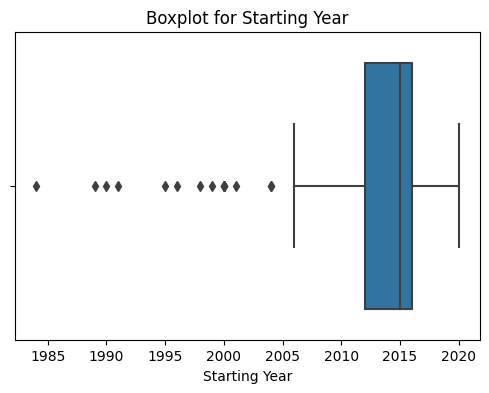

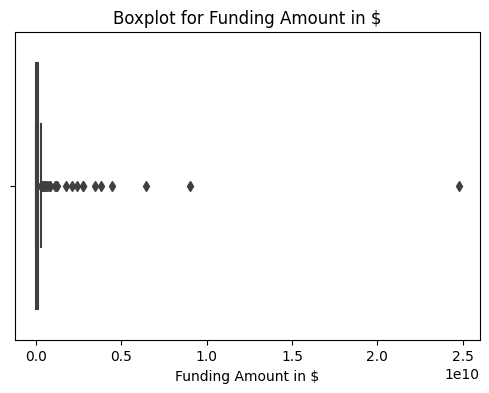

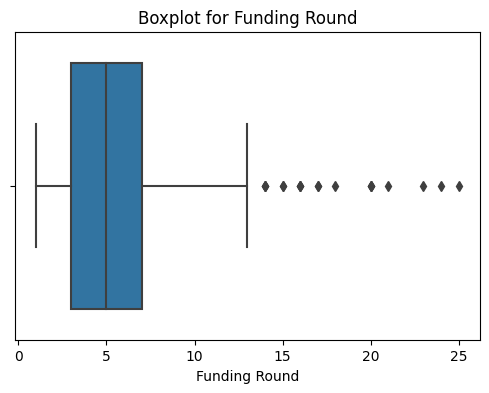

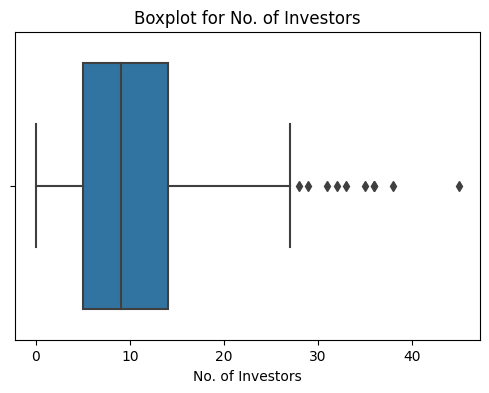

In [ ]:
columns = df.select_dtypes(include=['int']).columns

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
    print("\n")


In [ ]:
def find_outliers(df):

  q1=df.quantile(0.25)

  q3=df.quantile(0.75)

  IQR=q3-q1

  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

  return outliers

In [ ]:
for col in columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Starting Year : 15 ,It's Percentage is :  5.016722408026756 %


Number of outliers in Funding Amount in $ : 37 ,It's Percentage is :  12.37458193979933 %


Number of outliers in Funding Round : 18 ,It's Percentage is :  6.0200668896321075 %


Number of outliers in No. of Investors : 10 ,It's Percentage is :  3.3444816053511706 %




The dataset contains a limited number of outliers in the columns. However, due to the dataset's small size of only 300 rows, removing around 80 rows to address outliers might significantly impact the data. Therefore, as an alternative approach, considering the upper and lower limits of the columns for replacing outliers could be more suitable in this scenario.


---

###Before proceeding with handling outliers by replacing them with upper and lower limits, we will examine the distribution of the columns in the dataset.

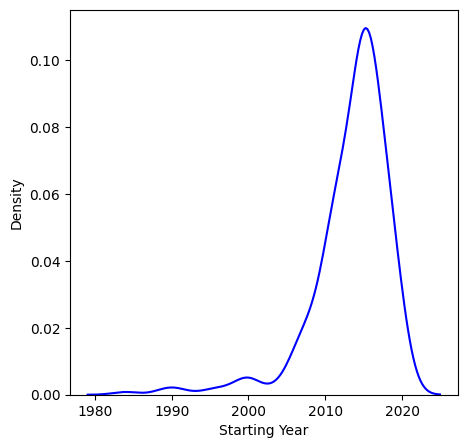

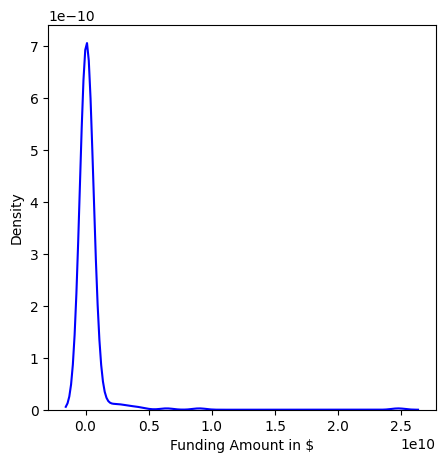

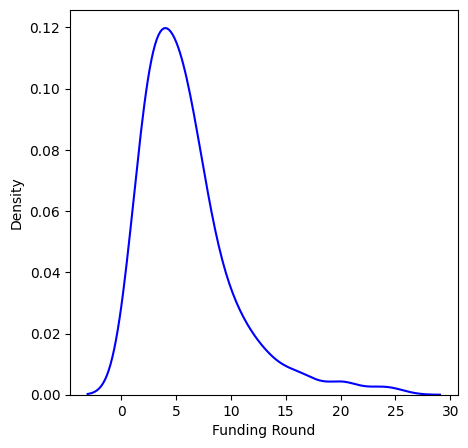

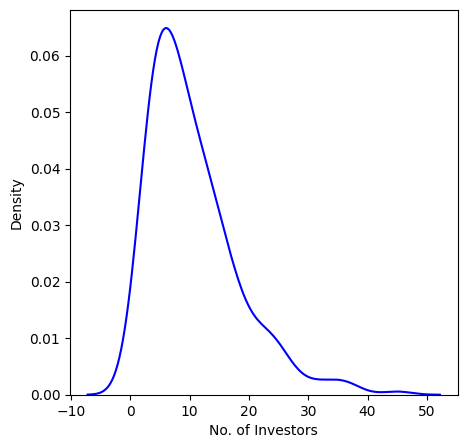

In [ ]:
for col in columns:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data=df, x=col,color='blue')
    plt.show()
    print("\n")

The numerical columns in the dataset display a  right-skewed distribution, except for the 'Starting Year' column, which showcases a left-skewed pattern. To fix these skewed distributions, I'll apply suitable transformation techniques.

Starting Year With Log1p Transformation


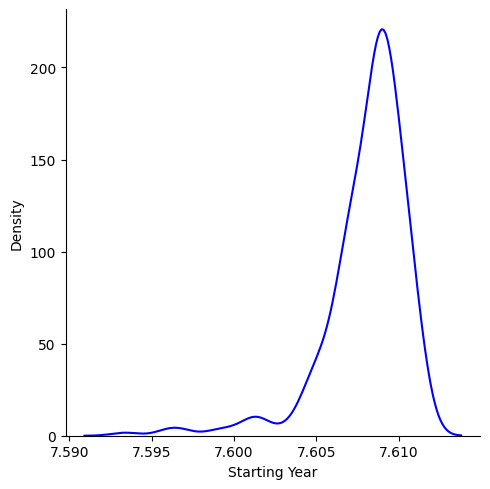



Starting Year With Log Transformation


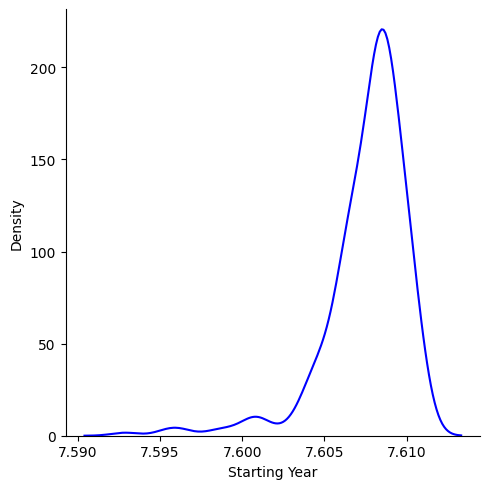



Starting Year With Cubic Root Transformation


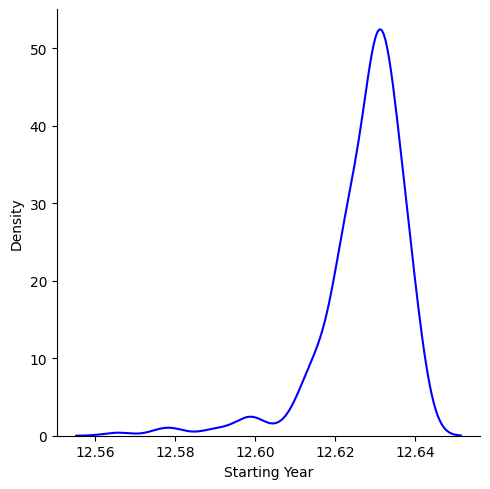



Starting Year With Square Root Transformation


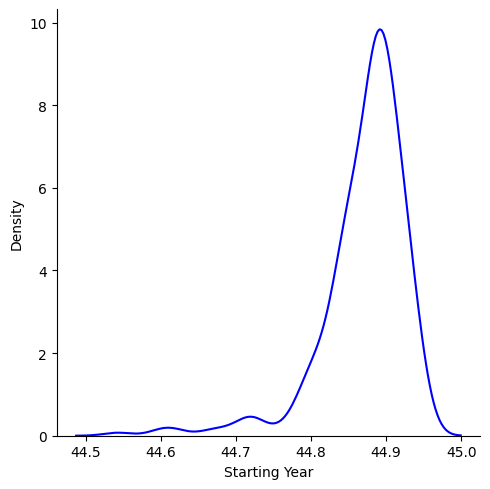



Funding Amount in $ With Log1p Transformation


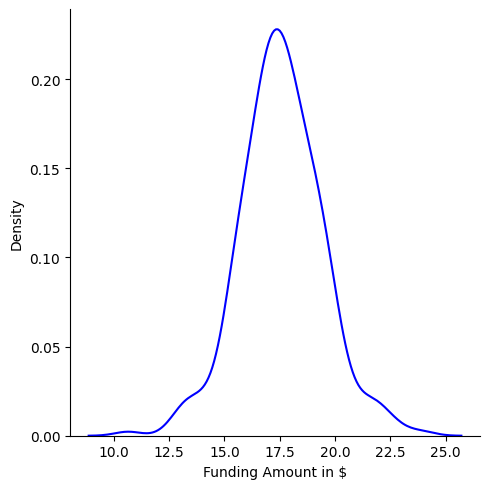



Funding Amount in $ With Log Transformation


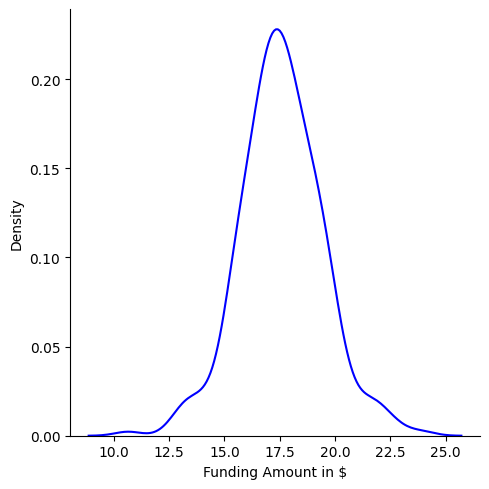



Funding Amount in $ With Cubic Root Transformation


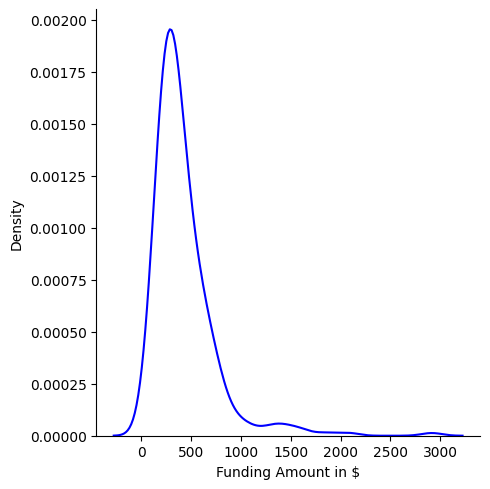



Funding Amount in $ With Square Root Transformation


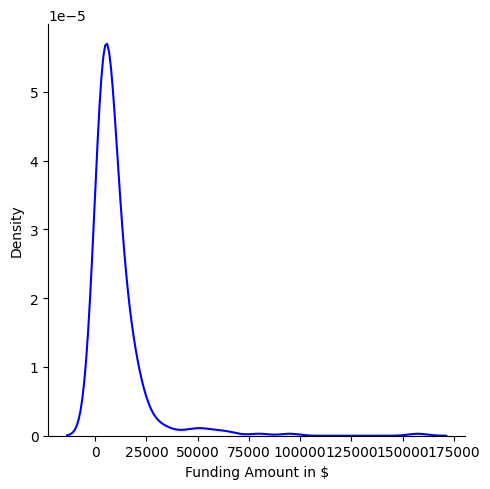



Funding Round With Log1p Transformation


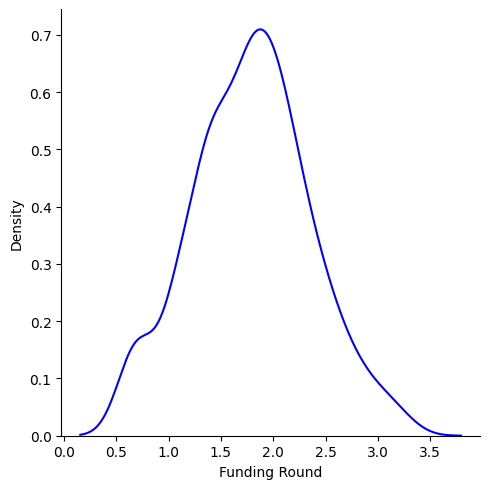



Funding Round With Log Transformation


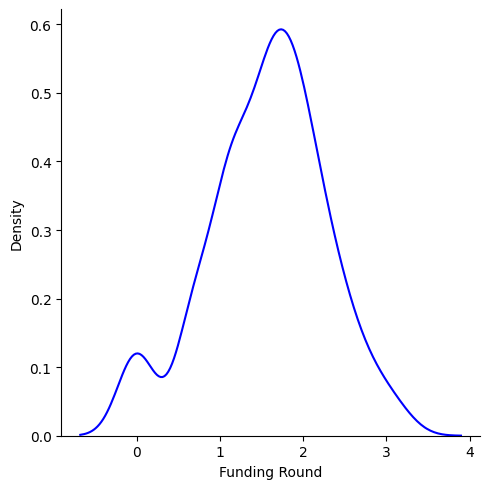



Funding Round With Cubic Root Transformation


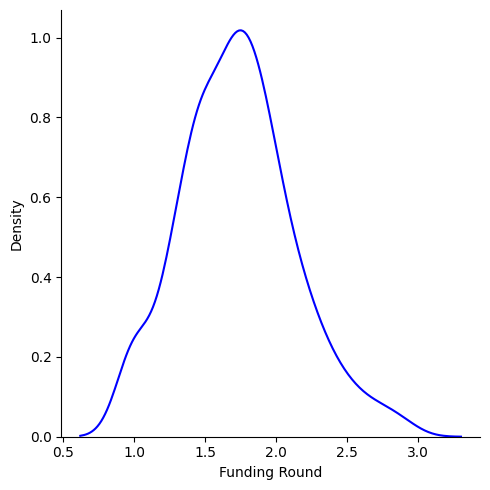



Funding Round With Square Root Transformation


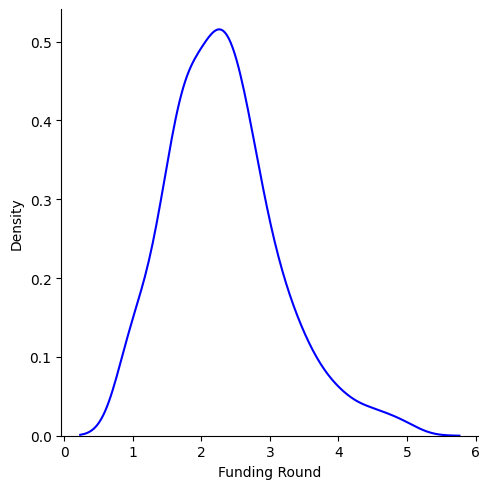



No. of Investors With Log1p Transformation


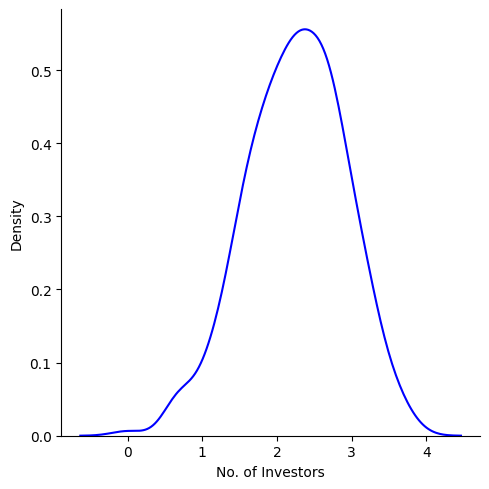



No. of Investors With Log Transformation


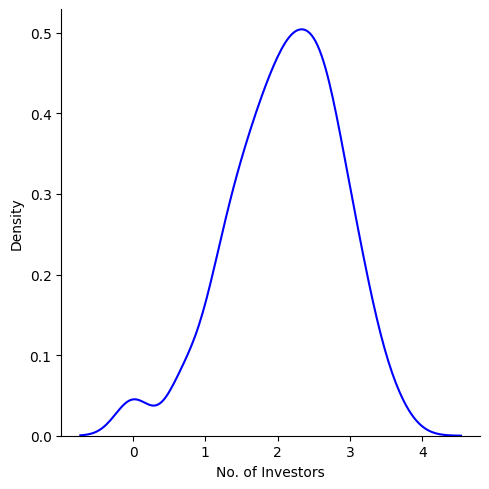



No. of Investors With Cubic Root Transformation


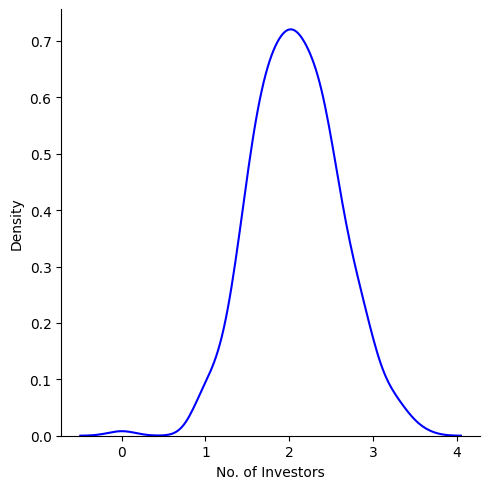



No. of Investors With Square Root Transformation


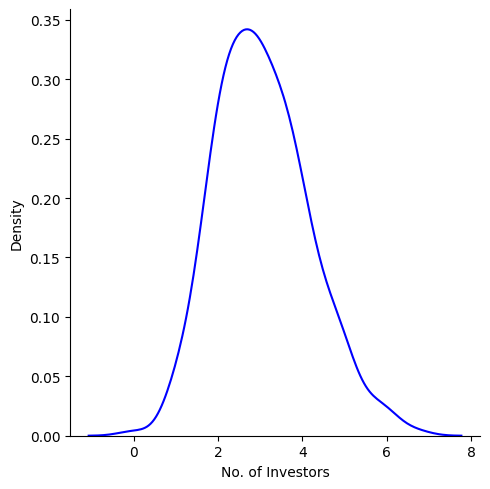

In [ ]:
for col in columns:
    print(col,"With Log1p Transformation")
    sns.displot(np.log1p(df[col]),kind='kde',color='blue')
    plt.show()
    print("\n")
    print(col,"With Log Transformation")
    sns.displot(np.log(df[col]),kind='kde',color='blue')
    plt.show()
    print("\n")
    print(col,"With Cubic Root Transformation")
    sns.displot(np.cbrt(df[col]),kind='kde',color='blue')
    plt.show()
    print("\n")
    print(col,"With Square Root Transformation")
    sns.displot(np.sqrt(df[col]),kind='kde',color='blue')
    plt.show()
    print("\n")

The log transformation method effectively normalizes the distributions of the **'Funding Amount'** and **'Funding Round'** columns, making them more closely resemble a normal distribution. However, for the 'No. of Investors' column, the cubic root transformation appears to be the most effective method in achieving a better approximation to a normal distribution.

In [ ]:
df['Funding Amount in $']=np.log(df['Funding Amount in $'])
df['Funding Round']=np.log(df['Funding Round'])
df['No. of Investors']=np.cbrt(df['No. of Investors'])

####Let's check back for the number of outliers.

In [ ]:
for col in columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Starting Year : 15 ,It's Percentage is :  5.016722408026756 %


Number of outliers in Funding Amount in $ : 8 ,It's Percentage is :  2.6755852842809364 %


Number of outliers in Funding Round : 1 ,It's Percentage is :  0.33444816053511706 %


Number of outliers in No. of Investors : 2 ,It's Percentage is :  0.6688963210702341 %




After addressing the skewness in the columns and achieving approximately normal distributions, the dataset currently contains only 11 outliers, which is a relatively small number. Considering the limited dataset size, it's imperative to retain as much data as possible. Hence, the approach will involve replacing these 11 outlier values with the upper and lower limits of each respective column.

In [ ]:
def replace_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for col in columns:
    lower_limit, upper_limit = replace_outlier(df[col]) #lower and upper range
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [ ]:
for col in columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Starting Year : 0 ,It's Percentage is :  0.0 %


Number of outliers in Funding Amount in $ : 0 ,It's Percentage is :  0.0 %


Number of outliers in Funding Round : 0 ,It's Percentage is :  0.0 %


Number of outliers in No. of Investors : 0 ,It's Percentage is :  0.0 %




In [ ]:
corr=df.corr()
corr

,Starting Year,Funding Amount in $,Funding Round,No. of Investors
Starting Year,1.000000,-0.480939,-0.255789,0.011501
Funding Amount in $,-0.480939,1.000000,0.644765,0.443341
Funding Round,-0.255789,0.644765,1.000000,0.702819
No. of Investors,0.011501,0.443341,0.702819,1.000000


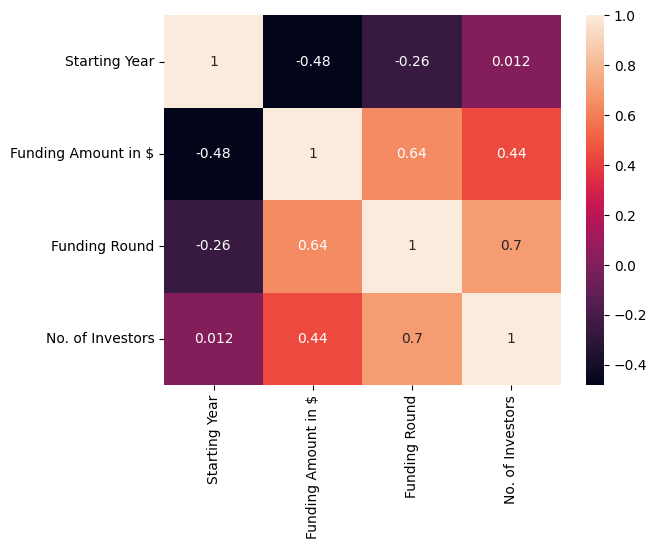

In [ ]:
sns.heatmap(data=corr,annot=True)
plt.show()

### 5. Features Scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

We are focusing on clustering the dataset based on **'funding Amount'**, **'Funding Round'** and **'No of Investors'**. To facilitate this clustering process, we'll exclude the 'City', 'Company Name', and 'Starting Year' columns from the scaled dataset.

In [ ]:
df2=df.drop(['Company','City','Starting Year','No. of Employees'],axis=1)

scaled_df = scaler.fit_transform(df2)
scaled_df = pd.DataFrame(scaled_df, columns=df2.columns)

In [ ]:
scaled_df.describe()

,Funding Amount in $,Funding Round,No. of Investors
count,2.990000e+02,2.990000e+02,2.990000e+02
mean,4.990434e-16,1.188199e-16,4.990434e-16
std,1.001676e+00,1.001676e+00,1.001676e+00
min,-2.468407e+00,-2.222627e+00,-2.793940e+00
25%,-6.088295e-01,-6.600038e-01,-7.230638e-01
50%,-2.087220e-02,6.657454e-02,6.712908e-03
75%,6.308889e-01,5.451595e-01,6.575203e-01
max,2.490466e+00,2.352904e+00,2.728397e+00


Now that all preprocessing steps, have been completed, the data is prepared for the modeling phase.

## Modeling

We intend to group the data into clusters based on  the required funding amount to initiate the company, the funding round associated with each company, and the count of investors investing in the company. These features will serve as the primary criteria for clustering the dataset.

> #### 1] KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

 ##### Visualiazing the Elbow method to get the optimal number of clusters.

I'll consider a maximum range of up to 10 clusters for the clustering process. Based on the characteristics and nature of this dataset, it seems reasonable to limit the number of clusters to 10 as it aligns with the domain understanding and requirements for this specific dataset.

In [ ]:
K=range(1,10)
WCSS = []
for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans=kmeans.fit(scaled_df)
    WCSS_iter = kmeans.inertia_
    WCSS.append(WCSS_iter)

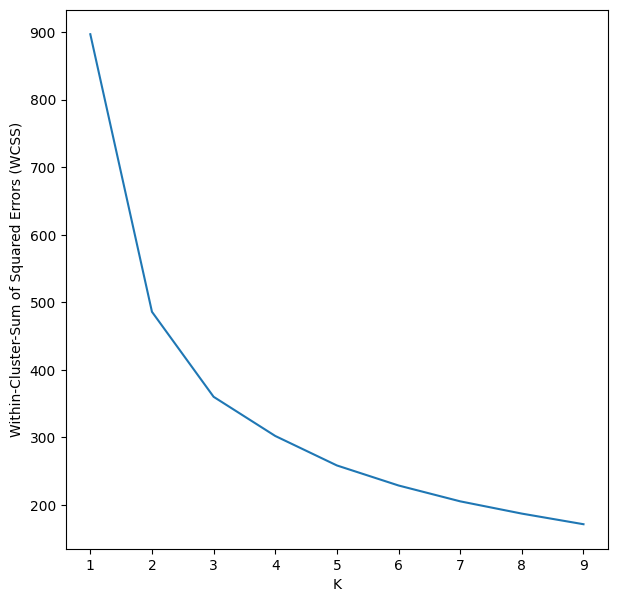

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.plot(K,WCSS)

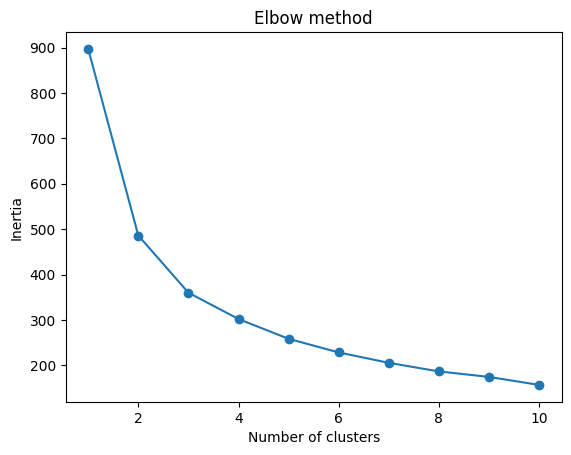

In [ ]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow method graoh that shows the optimal number of clusters  doesn't reveal a definitive point where the curve noticeably bends or stabilizes. This makes the task of finding the ideal number of clusters more challenging, as there is no clear elbow or distinct change in the curve.

----
The KElbowVisualizer module assists in determining the optimal number of clusters (k) by identifying the point with the least distortion score, aiding in selecting the best k value for clustering the data.

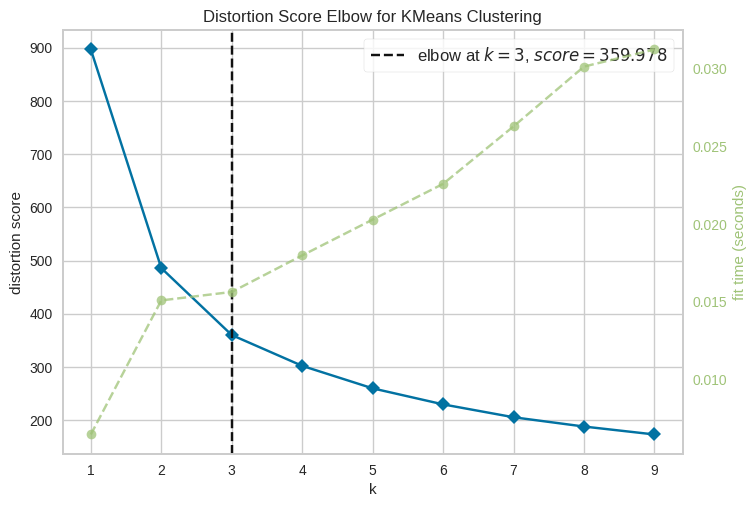

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(scaled_df)
visualizer.poof()
plt.show()

According to the output from the visualizer, the optimal number of clusters is determined to be 3.

-----

Another method to determine the best number of clusters is by employing the Silhouette Average Score. The optimal k value is identified as the number of clusters corresponding to the maximum Silhouette Score, indicating the most suitable clustering solution.

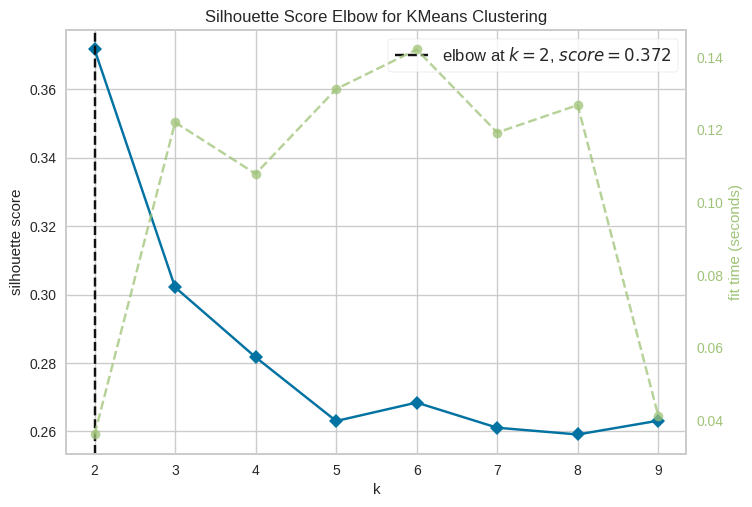

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(scaled_df)
visualizer.show()

As for the Silhouette Average Score analysis, the optimal number of clusters is determined to be k=2, indicating that a clustering solution with two clusters provides the best representation for the given data based on Silhouette Scores.

I've chosen to proceed with k=3 based on the elbow method, as it appears more reasonable and sensible to group these companies into three clusters rather than two, given the characteristics of the dataset and the observed trend in the elbow plot.

Instantiating a KMeans instance with 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300,random_state=0)

PredictedClusters= kmeans.fit_predict(scaled_df)
PredictedClusters

array([2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1], dtyp

Trying various metrics to evaluate the performance of the KMEANS clustering algorithm.

In [ ]:
silhouette_avg = silhouette_score(scaled_df,PredictedClusters)
print(f"Silhouette Score For Kmeans: {silhouette_avg:.5f}")

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_df, PredictedClusters)
print(f"Davies-Bouldin Index For Kmeans: {davies_bouldin:.5f}")

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(scaled_df, PredictedClusters)
print(f"Calinski-Harabasz Index For Kmeans: {calinski_harabasz:.5f}")

Silhouette Score For Kmeans: 0.30212
Davies-Bouldin Index For Kmeans: 1.09328
Calinski-Harabasz Index For Kmeans: 220.78880


Now after the dataset is grouped into 3 clusters,we Adding the cluster labels into our initial dataset and examining the corresponding values.

In [ ]:
df["Cluster"]=PredictedClusters
df['Cluster'].value_counts()

0    131
1     93
2     75
Name: Cluster, dtype: int64

* Cluster 0 contains 117 data points.
* Cluster 1 contains 94 data points.
* Cluster 2 contains 88 data points.

 Let's perform a detailed analysis of each cluster to uncover distinct patterns within them and generate insights based on it.

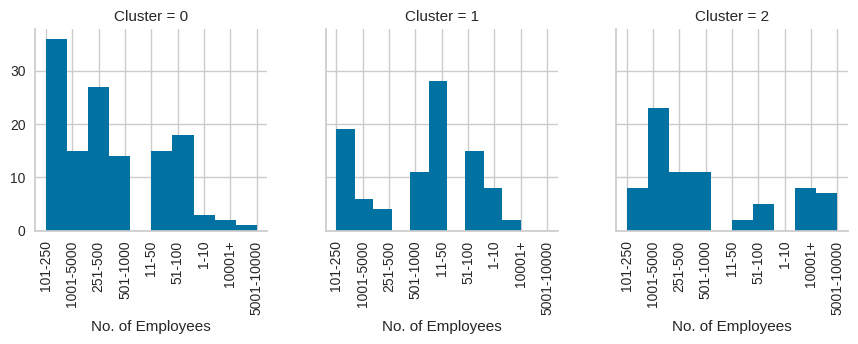

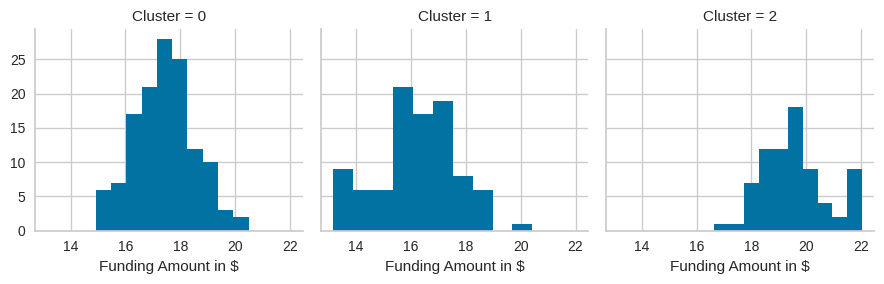

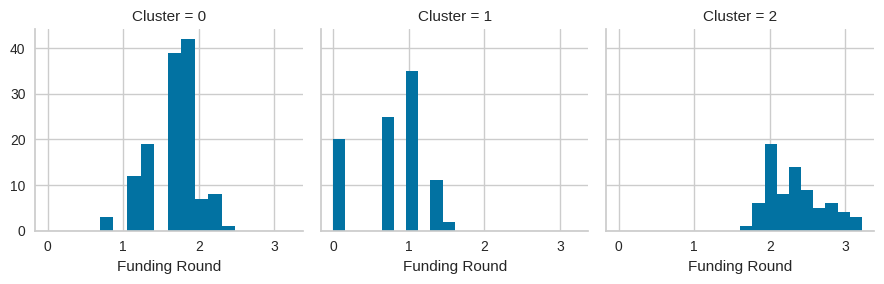

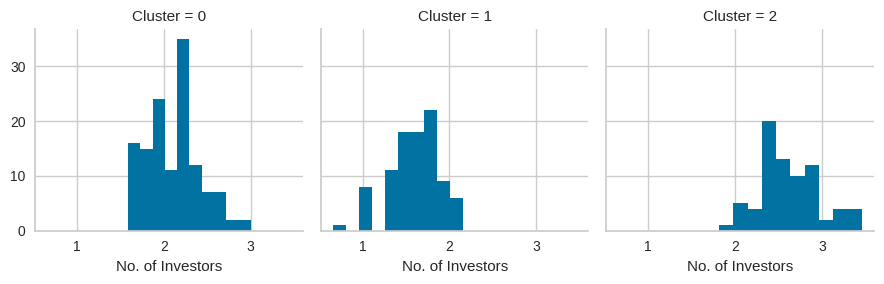

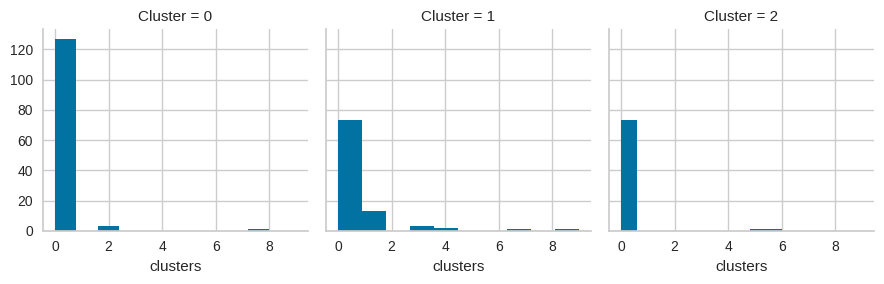

In [ ]:
for i, c in enumerate(df.drop(['Company', 'City', 'Starting Year', 'Cluster'], axis=1)):
    grid = sns.FacetGrid(df, col='Cluster')
    if i == 0:
        grid.map(plt.hist, c)
        grid.set_xticklabels(rotation=90)  # Rotate x-axis labels for the first column
    else:
        grid.map(plt.hist, c)
    plt.show()

**Cluster 0 Characteristics :**

  * Number of Employees: The majority of companies in this cluster have Number of employees ranging from 100 to 500 employees, representing a stable-sized team with operational capabilities.

  * Funding Stability: Companies in this cluster possess funding amounts close to the average, indicating a balanced and stable financial standing compared to other clusters.

  * Moderate Funding Round: The average or intermediate funding rounds within this cluster suggest a moderate level of investment, signifying a stage of steady growth without extremes.

  * Investor Engagement: The cluster shows an average number of investors, indicating stable interest from investors without too much speculation or minimal interest.

  These Companies have Stable and Moderate Growth Businesses which might be a good target for new investors to invest in companies within this cluster.

----
* **Cluster 1 Characterstics :**

Cluster 1 likely represents startups in their early stages with limited resources and potentially seeking initial support and guidance to fuel their growth and development.

* Number of Employees: Companies in this cluster typically have number of employees ranging from 11 to 250 employees, indicating a less workforce.

* Early Fudning Rounds :These startups are likely in their early operational phases, suggesting a stage of initial growth and development.

* Lower funding amounts: Indicative of the early stages in funding rounds and limited investor interest, as suggested by the lower number of investors involved.

We can strategize to target these companies by directing marketing efforts towards attracting investors and emphasizing the benefits of investing in them.

-----

* Cluster 2 Characterstics :**

Cluster 2 likely represent higher-rate development entities that have advanced beyond the startup phase and are in a phase of significant growth and maturity.

*  Number of Employees : Companies in this cluster have number of employees ranging from 500 to 1000+ employees, indicating larger-scale operations.

* Higher funding rounds : Companies within this cluster denote rapid development, with companies engaging in multiple fundraising events beyond the average. This indicates a mature growth stage, marked by larger operations, substantial funding, and increased investor involvement, signifying a transition away from the startup phase.

* Investment interest: Reflects increased investment amounts and greater participation from investors, underscoring significant financial support.


> #### 2. Hirerichal Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Getting the best linkage method to use for the dendogram with the highest silehoutte score.

In [ ]:
cluster_counts = range(2, 11)

linkage_methods = ['ward', 'complete', 'average', 'single']

best_score = -1
best_method = None
best_labels = None

# Iterate through cluster counts and linkage methods
for n_clusters in cluster_counts:
    for linkage_method in linkage_methods:
        # Apply hierarchical clustering
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        labels = model.fit_predict(scaled_df)

        # Calculate Silhouette Score
        score = silhouette_score(scaled_df, labels)

        # Check if this is the best score
        if score > best_score:
            best_score = score
            best_method = linkage_method
            best_labels = labels

# Print the best linkage method and Silhouette Score
print(f"Best Linkage Method: {best_method}")
print(f"Best Silhouette Score: {best_score}")


Best Linkage Method: average
Best Silhouette Score: 0.3780120153000543


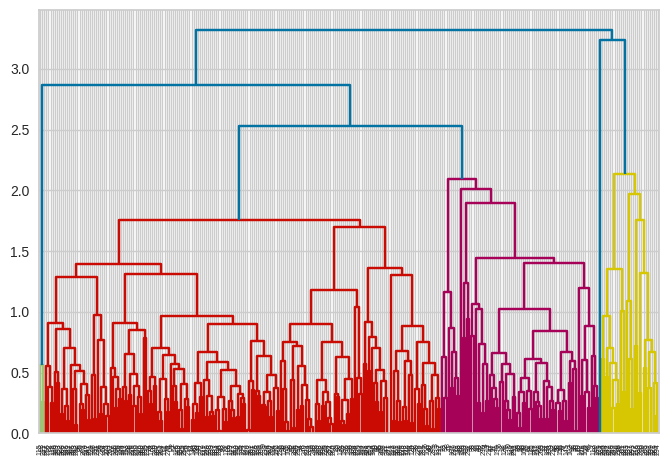

In [ ]:
linkage_data = linkage(scaled_df, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

Based on previous dendrogram, it seems that hierarchical clustering can not  be used to cluster this dataset.

> #### 3. DB SCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

dbscan.fit(scaled_df)

dbscan_labels = dbscan.labels_

In [ ]:
df['clusters']=labels

In [ ]:
df["clusters"].value_counts()

0    273
1     13
2      3
3      3
4      2
6      1
5      1
9      1
7      1
8      1
Name: clusters, dtype: int64

In [ ]:
silhouette_avg = silhouette_score(scaled_df,dbscan_labels)
print(f"Silhouette Score For DB SCAN: {silhouette_avg:.5f}")

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_df, dbscan_labels)
print(f"Davies-Bouldin Index For DB SCAN: {davies_bouldin:.5f}")

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(scaled_df, dbscan_labels)
print(f"Calinski-Harabasz Index For DB SCAN: {calinski_harabasz:.5f}")

Silhouette Score For DB SCAN: -0.09935
Davies-Bouldin Index For DB SCAN: 2.43156
Calinski-Harabasz Index For DB SCAN: 13.87551


Trying between different values for the **```eps```** and **```min_samples```** hyperparameters, didn't yield different results, and we see that it grouped the data into 10 clusters with one cluster having 90% of the dataset,which is not normal,so dbscan algorithm will is not suitable for clustering the dataset.

##Conclusion

KMEANS algorithm was the most suitable clustering algorithm to group these startups.